In [142]:
import pandas as pd
import numpy as np

# Random seed for reproducibility
np.random.seed(42)

# Sample data
product_ids = ['P001', 'P002', 'P003', 'P004', 'P005']
stores = ['Store A', 'Store B', 'Store C', 'Store D']
promotion_types = ['Discount', 'Buy One Get One Free', 'Flash Sale', 'No Promotion']
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Generate data
data = {
    'product_id': np.random.choice(product_ids, 10000),
    'store_location': np.random.choice(stores, 10000),
    'promotion_type': np.random.choice(promotion_types, 10000),
    'sales': np.random.randint(100, 1000, size=10000),
    'day_of_week': np.random.choice(days_of_week, 10000),
    'date': pd.date_range(start='2022-01-01', periods=10000, freq='D')
}

# Create the DataFrame
df = pd.DataFrame(data)
df.head()

,product_id,store_location,promotion_type,sales,day_of_week,date
0,P004,Store B,Discount,698,Saturday,2022-01-01
1,P005,Store B,Flash Sale,509,Thursday,2022-01-02
2,P003,Store C,No Promotion,992,Thursday,2022-01-03
3,P005,Store D,Discount,466,Sunday,2022-01-04
4,P005,Store A,No Promotion,874,Saturday,2022-01-05


In [143]:
# Data cleaning
# df.info()

# Handle missing values
print(df.isnull().sum()) # --> no null values
df.dropna(inplace=True)

# Remove duplicates (if any)
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Convert columns to the correct types
df.info()

# Extract useful features (like year, month from the date)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head()

product_id        0
store_location    0
promotion_type    0
sales             0
day_of_week       0
date              0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product_id      10000 non-null  object        
 1   store_location  10000 non-null  object        
 2   promotion_type  10000 non-null  object        
 3   sales           10000 non-null  int32         
 4   day_of_week     10000 non-null  object        
 5   date            10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 429.8+ KB


,product_id,store_location,promotion_type,sales,day_of_week,date,year,month,day
0,P004,Store B,Discount,698,Saturday,2022-01-01,2022,1,1
1,P005,Store B,Flash Sale,509,Thursday,2022-01-02,2022,1,2
2,P003,Store C,No Promotion,992,Thursday,2022-01-03,2022,1,3
3,P005,Store D,Discount,466,Sunday,2022-01-04,2022,1,4
4,P005,Store A,No Promotion,874,Saturday,2022-01-05,2022,1,5


In [144]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns


In [145]:
df.columns

Index(['product_id', 'store_location', 'promotion_type', 'sales',
       'day_of_week', 'date', 'year', 'month', 'day'],
      dtype='object')

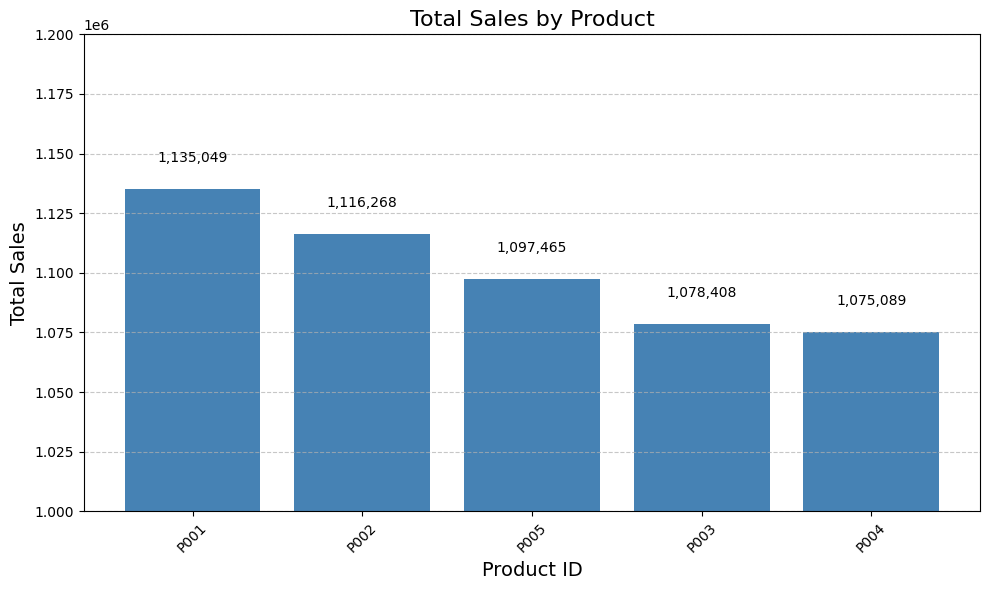

In [146]:
sales_by_product = df.groupby('product_id')['sales'].sum().sort_values(ascending=False)

# Sort values descending (optional, if not already sorted)
sales_by_product = sales_by_product.sort_values(ascending=False)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot with color customization
bars = ax.bar(sales_by_product.index, sales_by_product.values, color='steelblue')

# Title and axis labels
ax.set_title('Total Sales by Product', fontsize=16)
ax.set_ylabel('Total Sales', fontsize=14)
ax.set_xlabel('Product ID', fontsize=14)

# Set y-axis limits
ax.set_ylim(1000000, 1200000)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 10000,  # shift label up
            f'{int(height):,}', ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)

# Tight layout to avoid cutoff
plt.tight_layout()

# Show the plot
plt.show()


In [147]:
df.columns

Index(['product_id', 'store_location', 'promotion_type', 'sales',
       'day_of_week', 'date', 'year', 'month', 'day'],
      dtype='object')

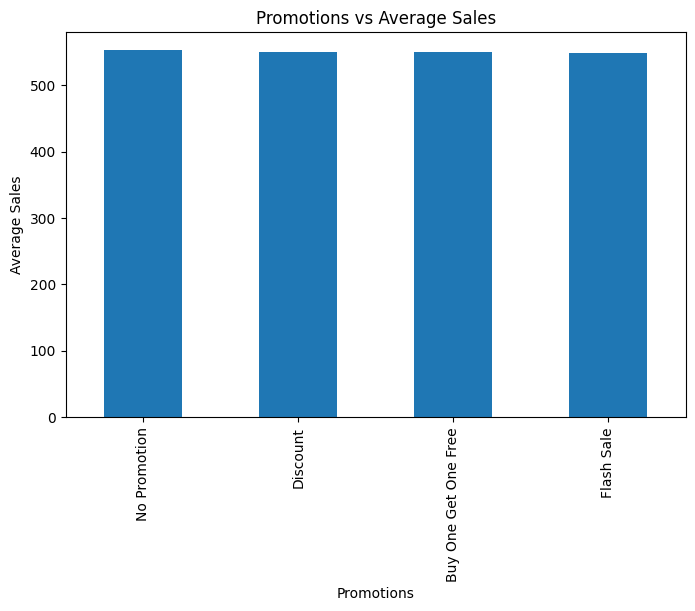

In [148]:
# How does promotion type affect sales?
promotion_vs_sales = df.groupby('promotion_type')['sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
promotion_vs_sales.plot(kind='bar')
plt.title('Promotions vs Average Sales')
plt.xlabel('Promotions')
plt.ylabel('Average Sales')
plt.show()


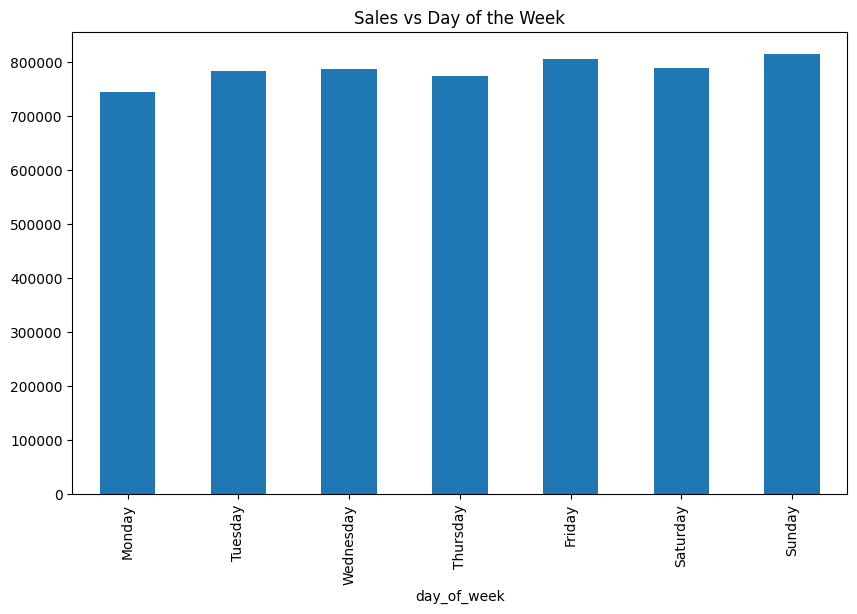

In [149]:
# What’s the sales distribution by day of the week?

sales_vs_day_of_week = df.groupby('day_of_week')['sales'].sum().reindex(days_of_week)
plt.figure(figsize=(10,6))
sales_vs_day_of_week.plot(kind='bar')
plt.title('Sales vs Day of the Week')
plt.show()


C:\Users\mshah\AppData\Local\Temp\ipykernel_47140\1600425626.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M')['sales'].sum()


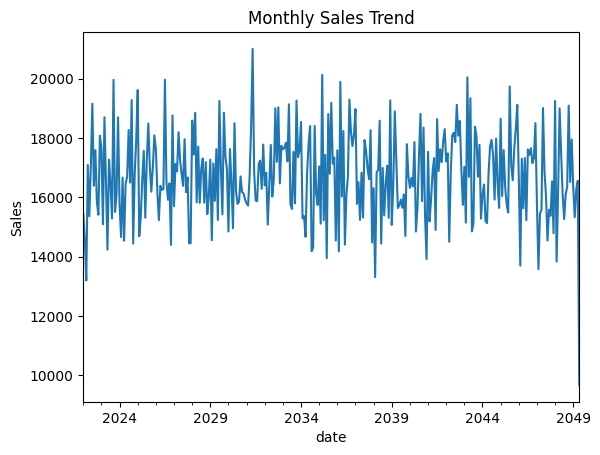

In [150]:
# 4. Sales Trend over Time
df.set_index('date', inplace=True)
monthly_sales = df.resample('M')['sales'].sum()
monthly_sales.plot(title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.show()


In [151]:
# # Feature Engineering

# # Sales Lag Features (previous day’s sales)
# df['sales_lag'] = df['sales'].shift(1)
# # Rolling Averages (e.g., average sales over the last 7 days)
# df['sakes_rolling_avg'] = df['sales'].rolling(window=7).mean()

# df.head(10)

In [152]:
# Step 5: Modeling with Sklearn
# To be continued...


In [153]:
# Feature Engineering Training

